<div align="center">

# Lecture 9: Machine Learning

ECON 294A, UC Santa Cruz

Pedro Vallocci

</div>

Sources:

- Leung, Michael. Class notes for Econ 224: ML Fundamentals. 2023.
- Hansen, Bruce. Econometrics. 2022.
- Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow. 2023.


## 9.1. Machine Learning vs. Econometrics

Applied econometric work typically proceeds as follows:

- We specify a model of a data-generating process (DGP), which may be known up to some vector of parameters. We want to obtain a good estimate of some aspect of the model $\theta_0$ 

ML, however, is concerned with **predicting** in environments **free of structural change**: environments where the social process that produced our dataset is the same as the social process that governs the future environment in which we want to make predictions. There are a great many business and scientific applications in which this assumption is reasonably true.

I.e.

- Netflix's engine that recommends you new shows based on what you watched (and what users similar to you liked)

- Facebook or Twitter feeds

Machine Learning is typically used to describe a set of algorithmic approaches to statistical learning. The methods are primarily focused on point prediction in settings with unknown structure. Machine learning methods generally allow for large sample sizes, large number of variables, and unknown structural form.

Common candidates for ML algorithms:

- Big data: datasets that have an unusually large number of observations $n$ relative to traditional applications; typically with 10M+ observations

- High-dimensional datasets:  datasets with an unusually large number of variables $p$; typically $p >> n$ 

Types of machine learning:

- Supervised learning: you are given predictors X, and dependent variable Y; you want to predict Y with X. (Not too different to a regression)

    - Does picture X contains a cat (binary outcome Y)? You could hire a human to label 1% of your pictures, and let ML find the optimal model to predict the rest.

- Unsupervised learning: find patterns or a structure in X.

    - E.g. finding clusters in data.

## 9.2. Dimensionality Reduction 1: LASSO + Common ML preprocessing steps

### 9.2.1. Introduction to LASSO

Let's recall OLS (Ordinary Least Squares). OLS is concerned with minimizing the sum of squared residuals in the data (difference between observed and predicted values). OLS estimates will necessarily include all predictors, regardless of their significance or relevance.

$\hat{\beta}_{O L S}=\arg \min _\beta \sum_{i=1}^n\left(y_i-\mathbf{x}_i^{\top} \beta\right)^2$

In the presence of multicollinear data (as high-dimensional data commonly is), OLS will lead to high variance of predictors and overfitting.

LASSO, however, minimizes the sum of the square residuals with a penalty proportional to the sum of the absolute values of the coefficients. Therefore, LASSO can handle multicollinearity by shrinking some coefficients to zero, and is therefore able to perform variable selection, resultig in a more parsimonious model.

$\hat{\beta}_{L A S S O}=\arg \min _\beta\left(\sum_{i=1}^n\left(y_i-\mathbf{x}_i^{\top} \beta\right)^2+\lambda \sum_{j=1}^p\left|\beta_j\right|\right)$

In the next steps, we will work with the `diabetes` dataframe.

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes(as_frame=True)

/Users/pedrovallocci/opt/anaconda3/envs/ds39/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Let's arrange the data in a neat dataframe.

In [3]:
import pandas as pd
diabetes_data = load_diabetes(as_frame=True)
diabetes = diabetes_data.frame

# Getting summary statistics
print(diabetes.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

### 9.2.2. ML Preprocessing 1: Standardization

Recall LASSO's optimization function.

$\hat{\beta}_{L A S S O}=\arg \min _\beta\left(\sum_{i=1}^n\left(y_i-\mathbf{x}_i^{\top} \beta\right)^2+\lambda \sum_{j=1}^p\left|\beta_j\right|\right)$

LASSO's penalty function penalizes the absolute size of coefficients. If the features are on different scales, the penalty will not be applied uniformly. Features with larger scales will dominate the penalty term, leading to biased coefficient estimates. Also, standardizing the features makes the coefficients more interpretable, as they represent the change in the response variable for a one standard deviation change in the predictor variable, rather than a one unit change.

Therefore, the first step before running LASSO (and most ML algorithms) is standardizing your dataset: that is, converting all your columns to mean 0 and variance 1.

In [4]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
diabetes[diabetes_data.feature_names] = scaler.fit_transform(diabetes[diabetes_data.feature_names])


# Getting summary statistics after standardization
print(diabetes.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   8.037814e-18  1.607563e-17 -2.813235e-17 -1.607563e-17 -8.037814e-18   
std    1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00   
min   -2.254290e+00 -9.385367e-01 -1.897929e+00 -2.363050e+00 -2.665411e+00   
25%   -7.841722e-01 -9.385367e-01 -7.196249e-01 -7.706500e-01 -7.200196e-01   
50%    1.131724e-01 -9.385367e-01 -1.531324e-01 -1.192138e-01 -9.084100e-02   
75%    8.005001e-01  1.065488e+00  6.569519e-01  7.493678e-01  5.961931e-01   
max    2.327895e+00  1.065488e+00  3.585718e+00  2.776058e+00  3.235851e+00   

               s2          s3            s4            s5            s6  \
count  442.000000  442.000000  4.420000e+02  4.420000e+02  4.420000e+02   
mean     0.000000    0.000000  1.607563e-17 -8.037814e-18 -1.607563e-17   
std      1.001133    1.001133  1.001133e+00  1.001133e+00  1.00


### IN-CLASS: 

1) Load the Linnerud Dataset:

The Linnerud dataset is a multi-output dataset that includes physical exercise data with 20 observations on 3 exercises and 3 physiological variables.
Load the dataset using `load_linnerud` from `sklearn.datasets`.

2) Standardize the Data:

Use `StandardScaler` from `sklearn.preprocessing` to standardize the features in the dataset.

3) Describe the Standardized Data:

Call the `describe` method on the standardized dataset to observe the summary statistics and confirm that the standardized dataset has a mean of 0 and a standard deviation of 1.

In [5]:
from sklearn.datasets import load_linnerud
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load linnerud dataset
linnerud_data = load_linnerud(as_frame=True)
linnerud = linnerud_data.frame

# Standardizing the features
scaler = StandardScaler()
linnerud_scaled = pd.DataFrame(scaler.fit_transform(linnerud), columns=linnerud.columns)

# Getting summary statistics after standardization
print(linnerud_scaled.describe())


              Chins        Situps         Jumps        Weight         Waist  \
count  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   
mean   1.776357e-16 -2.164935e-16  4.440892e-17  2.553513e-16  4.440892e-16   
std    1.025978e+00  1.025978e+00  1.025978e+00  1.025978e+00  1.025978e+00   
min   -1.640004e+00 -1.566847e+00 -9.063789e-01 -1.687074e+00 -1.409851e+00   
25%   -9.121915e-01 -7.305392e-01 -6.162576e-01 -7.417310e-01 -7.690096e-01   
50%    3.978708e-01 -3.779782e-01 -3.261364e-01 -1.080393e-01 -1.281683e-01   
75%    7.375166e-01  1.056863e+00  2.991251e-01  5.360409e-01  5.126731e-01   
max    1.465329e+00  1.729189e+00  3.595503e+00  2.842263e+00  3.396459e+00   

              Pulse  
count  2.000000e+01  
mean  -2.220446e-16  
std    1.025978e+00  
min   -1.437149e+00  
25%   -6.545432e-01  
50%   -1.565212e-01  
75%    6.260848e-01  
max    2.547027e+00  


### 9.2.3. ML Preprocessing 2: One-hot encoding 

If your dataset has any categorical variables (even if encoded by numbers, such as 1 = Sunday, 2 = Monday etc.), you need to perform one-hot encoding before any other preprocessing steps, not 

The `diabetes` dataset does not have any categorical variables, so I'll add one so that we can perform one-hot encoding on it.

In [6]:
diabetes['category'] = np.random.choice(['A', 'B', 'C'], size=len(diabetes))
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,category
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0,A
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0,B
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0,B
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0,A
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0,A


`OneHotEncoder` with create N columns for each of the N values of `category`.

In [7]:
from sklearn.preprocessing import OneHotEncoder
diabetes = diabetes_data.frame

# Creating a new categorical feature for demonstration purposes
diabetes['category'] = np.random.choice(['A', 'B', 'C'], size=len(diabetes))

# 2) Preprocess with OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_category = encoder.fit_transform(diabetes[['category']])
encoded_category_df = pd.DataFrame(encoded_category, columns=encoder.get_feature_names_out(['category']))

print(diabetes['category'].head())
print(encoded_category_df.head())

0    A
1    C
2    B
3    B
4    C
Name: category, dtype: object
   category_A  category_B  category_C
0         1.0         0.0         0.0
1         0.0         0.0         1.0
2         0.0         1.0         0.0
3         0.0         1.0         0.0
4         0.0         0.0         1.0


Proceed with standardization as usual.

In [8]:
diabetes = diabetes.drop('category', axis=1)
diabetes = pd.concat([diabetes, encoded_category_df], axis=1)

# 3) Standardize the data
scaler = StandardScaler()
diabetes_scaled = pd.DataFrame(scaler.fit_transform(diabetes), columns=diabetes.columns)

# 4) Describe the standardized data
print(diabetes_scaled.describe())

                age           sex           bmi          bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  442.000000  4.420000e+02   
mean   1.607563e-17  1.607563e-17 -1.205672e-17    0.000000 -8.037814e-18   
std    1.001133e+00  1.001133e+00  1.001133e+00    1.001133  1.001133e+00   
min   -2.254290e+00 -9.385367e-01 -1.897929e+00   -2.363050 -2.665411e+00   
25%   -7.841722e-01 -9.385367e-01 -7.196249e-01   -0.770650 -7.200196e-01   
50%    1.131724e-01 -9.385367e-01 -1.531324e-01   -0.119214 -9.084100e-02   
75%    8.005001e-01  1.065488e+00  6.569519e-01    0.749368  5.961931e-01   
max    2.327895e+00  1.065488e+00  3.585718e+00    2.776058  3.235851e+00   

               s2          s3            s4            s5            s6  \
count  442.000000  442.000000  4.420000e+02  4.420000e+02  4.420000e+02   
mean     0.000000    0.000000  1.607563e-17 -8.037814e-18 -8.037814e-18   
std      1.001133    1.001133  1.001133e+00  1.001133e+00  1.001133e+00   
min   

### 9.2.4. ML Preprocessing 4: Train-test split (valid for most ML methods, not only LASSO)

When optimizing a ML model, we should make sure that we optimize for out-of-sample error, to avoid overfitting. Splitting data in train data and test data is easy in Python.

In [9]:
# Define feature matrix X and target vector y
# Let's first delete the category columns
diabetes_scaled = diabetes_scaled.drop(encoded_category_df.columns, axis=1)
# Let's also drop the target column
diabetes_scaled = diabetes_scaled.drop('target', axis=1)
X = diabetes_scaled
y = diabetes_data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,442.000000,442.000000,4.420000e+02,4.420000e+02,4.420000e+02
mean,1.607563e-17,1.607563e-17,-1.205672e-17,0.000000,-8.037814e-18,0.000000,0.000000,1.607563e-17,-8.037814e-18,-8.037814e-18
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,1.001133,1.001133,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363050,-2.665411e+00,-2.430626,-2.150883,-1.606102e+00,-2.651040e+00,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-0.770650,-7.200196e-01,-0.638249,-0.738296,-8.303008e-01,-6.989486e-01,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-0.119214,-9.084100e-02,-0.080291,-0.138431,-5.449919e-02,-4.093693e-02,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,0.749368,5.961931e-01,0.627442,0.616239,7.213025e-01,6.818506e-01,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776058,3.235851e+00,4.179278,3.809072,3.894331e+00,2.808722e+00,2.851075e+00


### IN-CLASS: 
Create a train-test split in the Linnerud dataset. As target, use `y = linnerud_data.target['Weight']`.

In [10]:
from sklearn.datasets import load_linnerud
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load linnerud dataset
linnerud_data = load_linnerud(as_frame=True)
linnerud = linnerud_data.frame

# Standardizing the features
scaler = StandardScaler()
linnerud_scaled = pd.DataFrame(scaler.fit_transform(linnerud), columns=linnerud.columns)

# Getting summary statistics after standardization
print(linnerud_scaled.describe())

X = linnerud_scaled
y = linnerud_data.target['Weight']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.describe()

              Chins        Situps         Jumps        Weight         Waist  \
count  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   
mean   1.776357e-16 -2.164935e-16  4.440892e-17  2.553513e-16  4.440892e-16   
std    1.025978e+00  1.025978e+00  1.025978e+00  1.025978e+00  1.025978e+00   
min   -1.640004e+00 -1.566847e+00 -9.063789e-01 -1.687074e+00 -1.409851e+00   
25%   -9.121915e-01 -7.305392e-01 -6.162576e-01 -7.417310e-01 -7.690096e-01   
50%    3.978708e-01 -3.779782e-01 -3.261364e-01 -1.080393e-01 -1.281683e-01   
75%    7.375166e-01  1.056863e+00  2.991251e-01  5.360409e-01  5.126731e-01   
max    1.465329e+00  1.729189e+00  3.595503e+00  2.842263e+00  3.396459e+00   

              Pulse  
count  2.000000e+01  
mean  -2.220446e-16  
std    1.025978e+00  
min   -1.437149e+00  
25%   -6.545432e-01  
50%   -1.565212e-01  
75%    6.260848e-01  
max    2.547027e+00  


,Chins,Situps,Jumps,Weight,Waist,Pulse
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,1.776357e-16,-2.164935e-16,4.440892e-17,2.553513e-16,4.440892e-16,-2.220446e-16
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-1.640004e+00,-1.566847e+00,-9.063789e-01,-1.687074e+00,-1.409851e+00,-1.437149e+00
25%,-9.121915e-01,-7.305392e-01,-6.162576e-01,-7.417310e-01,-7.690096e-01,-6.545432e-01
50%,3.978708e-01,-3.779782e-01,-3.261364e-01,-1.080393e-01,-1.281683e-01,-1.565212e-01
75%,7.375166e-01,1.056863e+00,2.991251e-01,5.360409e-01,5.126731e-01,6.260848e-01
max,1.465329e+00,1.729189e+00,3.595503e+00,2.842263e+00,3.396459e+00,2.547027e+00


Fitting LASSO is that simple. The penalty term $\lambda$ is called $\alpha$ in Python.

In [11]:
# Initialize and train the LASSO model
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [12]:
# Make predictions on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'LASSO Coefficients: {lasso.coef_}')

Mean Squared Error: 0.11960670311294963
R-squared: 0.9995746371971977
LASSO Coefficients: [-0.         -0.         -0.         23.61414963  0.         -0.        ]


### 9.2.5. ML model optimization: Cross-validation

As you can see, the penalty parameter remains as a variable of choice.

What if the optimal `alpha` were also data-driven. We can do that. It suffices that we chooses the `alpha` that performs best out-of-sample, for different splits of train and test data. `cv=5` states that we will fit 5-fold cross-validation.

Example:

<img src="cv5fold.png" alt="5-Fold Cross-Validation" width="600" height="400">



In [13]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Optimal alpha: {lasso_cv.alpha_}')
print(f'LASSO Coefficients: {lasso_cv.coef_}')

Mean Squared Error: 0.00034028515625028914
R-squared: 0.9999987898282952
Optimal alpha: 0.02666943082011571
LASSO Coefficients: [-0.         -0.         -0.         24.04126243  0.         -0.        ]


### IN-CLASS:

Find the optimal coefficients for the Linnerud dataset using CV.

## 9.3. Dimensionality reduction 2: PCA

Principal component analysis is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data into it. 

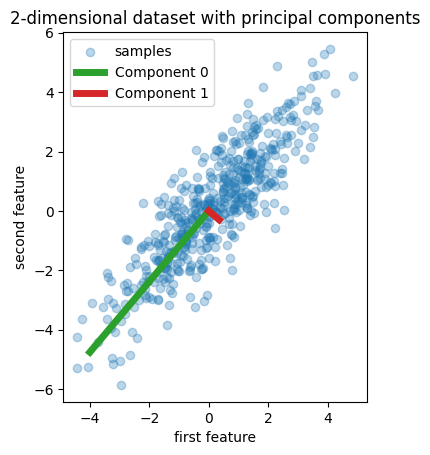

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()


Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane. For example, a simple 2D dataset is represented on the left, along with 3 different axes (i.e. 1D hyperplanes). On the right is the result of the projection of the dataset onto each of these axes. As you can see, the projection onto the solid line preserves the maximum variance, while the projection onto the dotted line preserves very little variance (bottom). 

<img src="pca.png" alt="5-Fold Cross-Validation" width="600" height="400">

Now let's see step by step how to run PCA in our data. Our first step again is to standardize the data.

In [15]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with the features
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Define the target vector (optional, used for plotting later)
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%). Let's notice that this condition is fulfilled below.

Explained variance ratio: [0.72962445 0.22850762]
Cumulative explained variance: [0.72962445 0.95813207]


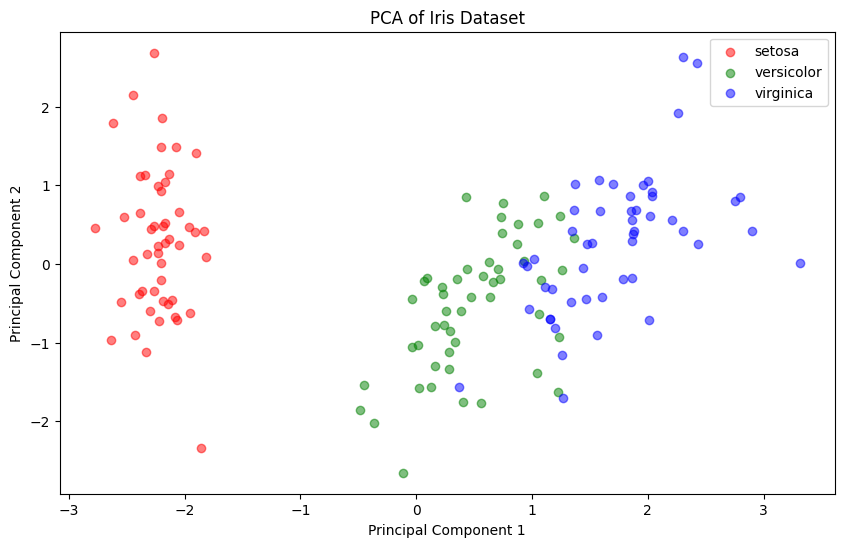

In [16]:
# Initialize PCA, specify the number of components to keep
pca = PCA(n_components=2)  # Here, we keep 2 components for visualization

# Fit the PCA model to the scaled data
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}')

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add the target variable for plotting
pca_df['target'] = y

# Plot the PCA results
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for target, color in zip(np.unique(y), colors):
    indices = pca_df['target'] == target
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], color=color, alpha=0.5, label=iris.target_names[target])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Iris Dataset')
plt.show()


### IN-CLASS: Eigenfaces

Dataset consists of 400 faces


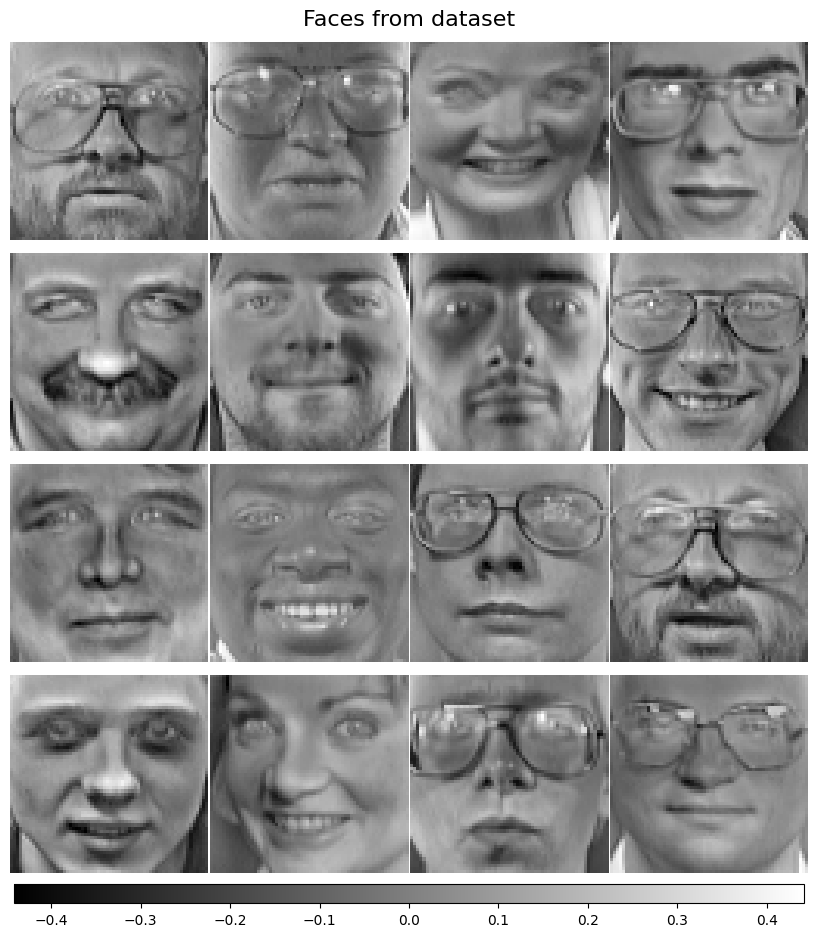

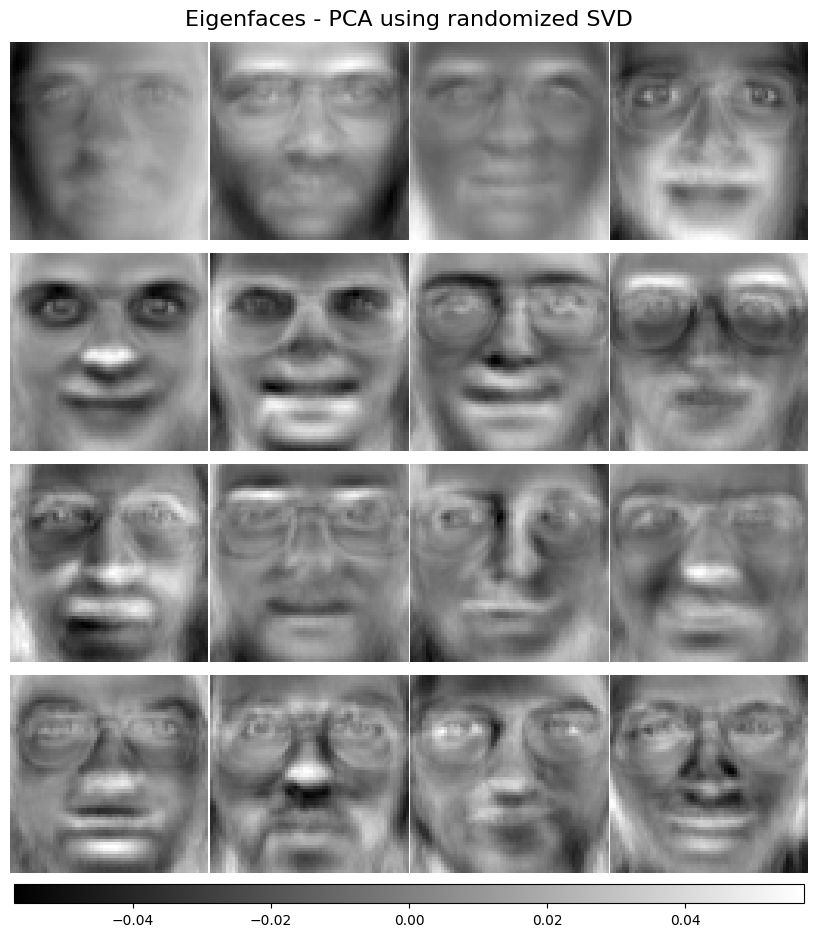

Explained variance ratio: [0.18154651 0.10176547 0.07104155 0.05596612 0.04068941 0.03342151
 0.02613543 0.02586309 0.02152118 0.02033982 0.018289   0.01626765
 0.01529051 0.01358845 0.01275644 0.01195711]
Cumulative explained variance: [0.18154651 0.28331196 0.35435352 0.41031963 0.45100904 0.48443055
 0.510566   0.5364291  0.55795026 0.5782901  0.5965791  0.61284673
 0.62813723 0.64172566 0.6544821  0.66643924]


In [17]:
import logging
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn import cluster, decomposition
from sklearn.datasets import fetch_olivetti_faces

rng = RandomState(0)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = faces - faces.mean(axis=0)
# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

n_row, n_col = 4, 4
n_components = n_row * n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

plot_gallery("Faces from dataset", faces_centered[:n_components])

pca_estimator = decomposition.PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
pca_estimator.fit(faces_centered)
plot_gallery(
    "Eigenfaces - PCA using randomized SVD", pca_estimator.components_[:n_components]
)
print(f'Explained variance ratio: {pca_estimator.explained_variance_ratio_}')
print(f'Cumulative explained variance: {np.cumsum(pca_estimator.explained_variance_ratio_)}')

In [18]:
faces_centered

array([[ 0.27765974,  0.21050064,  0.1808518 , ..., -0.22626604,
        -0.22262967, -0.227702  ],
       [ 0.41331112,  0.3668132 ,  0.312371  , ...,  0.20690602,
         0.35930276,  0.38728827],
       [ 0.0167652 , -0.0421294 , -0.06351379, ...,  0.43019482,
         0.41317004,  0.28413075],
       ...,
       [ 0.12508598,  0.13643926,  0.14811277, ..., -0.17636046,
        -0.13966623, -0.1488708 ],
       [ 0.08992872,  0.0558275 ,  0.02617866, ...,  0.11492857,
         0.09377155,  0.09696367],
       [-0.06032472, -0.12335157, -0.1901905 , ..., -0.00639924,
        -0.10193643, -0.06981868]], dtype=float32)

## 9.4. Supervised Learning 1: Support Vector Machines

Fundamental idea of SVM: fitting the widest possible "street" between the two classes. 

<img src="svm.png" alt="5-Fold Cross-Validation">

In practice, we can allow for outliers, while limiting margin violations.

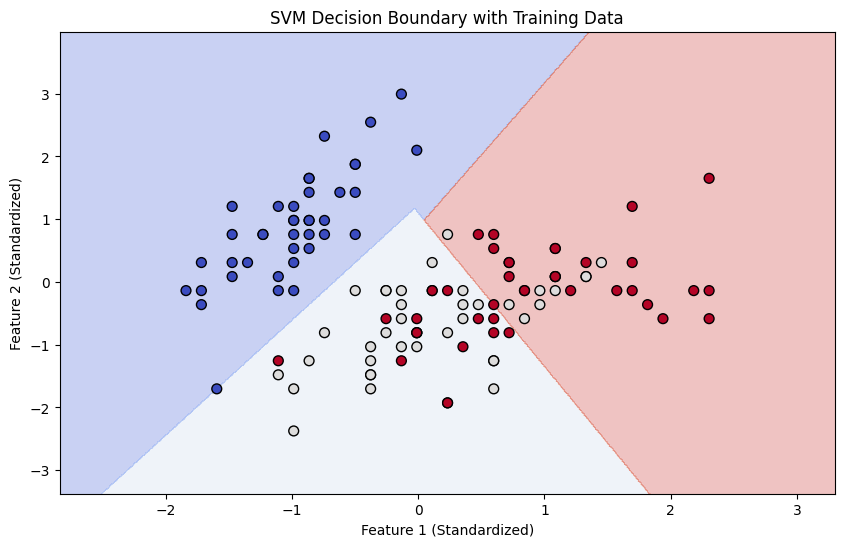

In [19]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()

# Reduce the dataset to two features for visualization
X = iris.data[:, :2]  # We take the first two features for simplicity
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)


# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Create a mesh to plot the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the labels for the mesh grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=50, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('SVM Decision Boundary with Training Data')

plt.show()


### 9.4.1. ML model evaluation: Evaluating Classification Performance

- **Purpose**: After training a classification model, it's essential to evaluate its performance to understand how well it predicts the target classes.
- **Common Metrics**: Accuracy, precision, recall, F1-score, and confusion matrix.

Using `classification_report`:
- **Function**: `classification_report` provides a comprehensive summary of the precision, recall, F1-score, and support for each class.

Output:
- Precision: The ratio of correctly predicted positive observations to the total predicted positives.

- Recall: The ratio of correctly predicted positive observations to the all observations in the actual class.

- F1-Score: The weighted average of precision and recall. It considers both false positives and false negatives.

- Support: The number of occurrences of each class in the actual data.


In [20]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



- Confusion Matrix: A table used to describe the performance of a classification model. It shows the actual versus predicted classifications.

- Explanation:
    - Matrix Layout: Each row represents the actual class, while each column represents the predicted class.

    - Diagonal Elements: Represent the number of correct predictions for each class.
    
    - Off-diagonal Elements: Represent the number of incorrect predictions, indicating where the model made mistakes.

[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


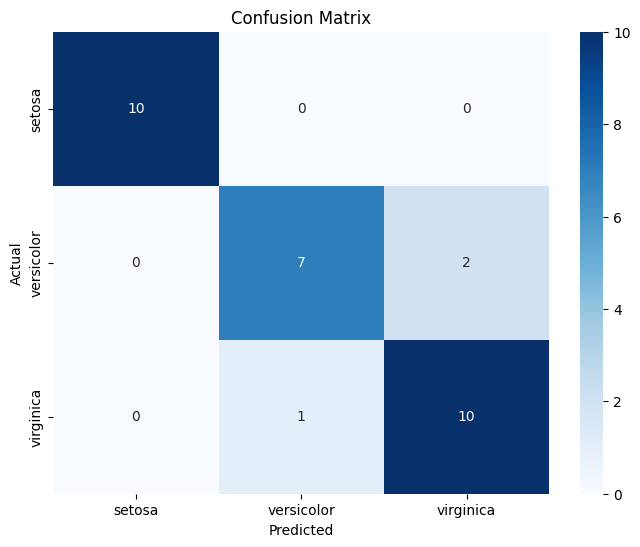

In [21]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### IN-CLASS: 
Redo the exercise above `kernel='rbf'`. As for parameters, choose `C=1, gamma=3`. How does the plot vary?

Plot the classification report and the confusion matrix for the SVM algorithm above.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.73      0.89      0.80         9
           2       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30

[[10  0  0]
 [ 0  8  1]
 [ 0  3  8]]


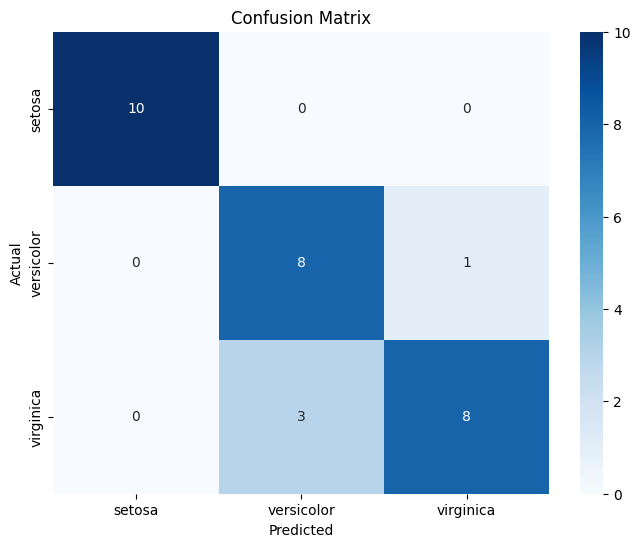

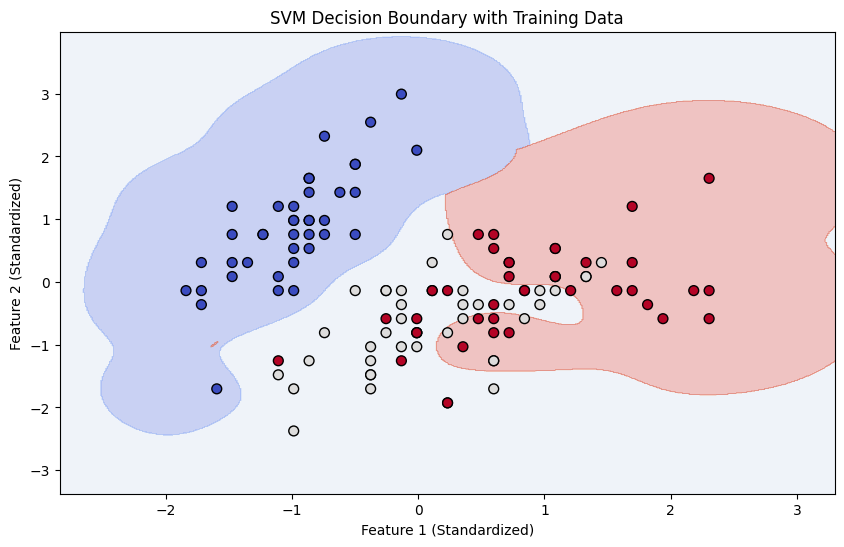

In [22]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()

# Reduce the dataset to two features for visualization
X = iris.data[:, :2]  # We take the first two features for simplicity
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model with a Gaussian kernel
svm = SVC(kernel='rbf', C=1, gamma=3, random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Create a mesh to plot the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the labels for the mesh grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=50, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('SVM Decision Boundary with Training Data')

plt.show()

## 9.5. Supervised Learning 2: Random Forests


### 9.5.1. Decision trees

A Random Forest is a collective of Decision Trees. Tree-based methods have been found in practice to deliver good predictions out of the box, with relatively little tuning. They can also handle high-dimensional covariates in terms of their computational implementation.

Decision Trees can be of two kinds:
- Regression trees: when the outcome is a regression. I.e. when you estimate $\mathrm{E}[Y | X]$
- Classification trees: when the outcome is categorical. I.e. when you estimate $\mathbf{P}(Y=k \mid X)$ for each category k.

Then we do the following:

1. Divide the sample according to the bins dictated by the leaves of the tree.

2. Compute the average $Y$ in each bin. The regression tree estimator $\hat{\mathbf{E}}[Y \mid X=x]$ is the average $Y$ of the bin in which $x$ lies. If you are performing classification, the classification tree estimator is the most common category within each bin.

To create a decision tree, we pick a covariate, split its support into two halves (e.g. "income $\leqslant \$ 100 k$ " and "income $>\$ 100 k$ "), and for each half, we repeat this process, eventually stopping according to some rule. 

In [23]:
%pip install pydotplus
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [44]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [53]:
# Load the Iris dataset
from sklearn import datasets
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()

DecisionTreeClassifier(max_depth=2)

In [57]:
# Load the Iris dataset as a DataFrame:
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
# Write iris.target as their respective species names
iris_df['target'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Let's create the following example to visualize splits. Since this is only for visualization, we are not creating train/test splits here.

In [62]:

# Reduce the dataset to two features for visualization
X = iris.data[:, 2:]  # Petal length and width
y = iris.target

# Initialize and train the Decision Tree model
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

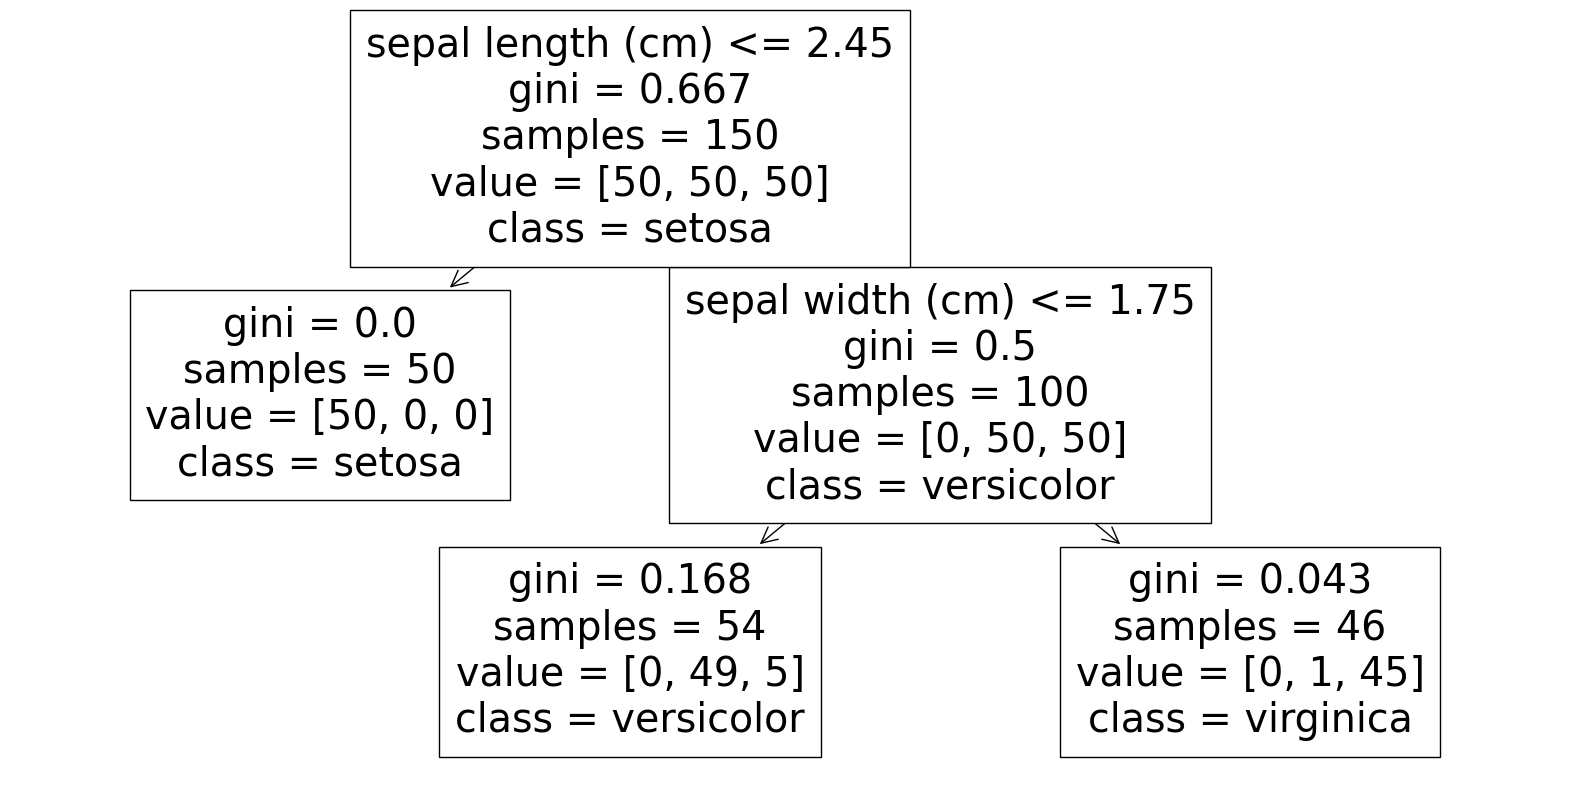

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names = iris.feature_names, class_names = iris.target_names)
plt.show()

### 9.5.2. How are predictions made for this decision tree?

Suppose you find an iris flower and you want to classify it. You start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is, then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf node (i.e., it does not have any children nodes), so it does not ask any questions: you can simply look at the predicted class for that node and the Decision Tree predicts that your flower is an Iris-Setosa (class=setosa).

### 9.5.3. How to choose the optimal splits in a decision tree?

 The goal is to partition the data in such a way that the resulting subsets (child nodes) are as pure as possible. 

 $G i n i=1-\sum_{i=1}^n p_i^2$

 where $p_i$ is the probability of an element being classified into class $i$.

 E.g. 
 If a node has 100% class A, 0% class B, 0% class C, it classifies perfectly, so its Gini is equal to $ 1 - (1+0+0) = 0$.

 If a node has 33% class A, 33% class B, 33% class C, it does not help us classifying at all. Its Gini is equal to $ 1 - (1/9+1/9+1/9) = 2/3 \approx 0.66$.

 In each step, the decision tree will find the split in each column that gives us the lowest Gini impurity (weighted by node sizes) after the split.

### 9.5.4. What is a Random Forest?

- **Definition**: A Random Forest is an ensemble learning method for classification, regression, and other tasks. It operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

#### Key Characteristics
- **Ensemble Method**: Combines multiple decision trees to improve model accuracy and control overfitting.

- **Bagging (Bootstrap Aggregating)**: Randomly selects subsets of the training data (with replacement) to train each decision tree. This ensures that each tree is trained on a different portion of the data.

- **Feature Randomness**: During the construction of each tree, a random subset of features is selected at each split, promoting diversity among the trees.

#### How Random Forest Works
1. **Data Sampling**:
   - Randomly sample the training data with replacement to create multiple bootstrap samples.

   - Each bootstrap sample is used to train a separate decision tree.

2. **Tree Construction**:
   - For each tree, at each node, a random subset of features is considered for splitting.

   - The best split is chosen from this subset of features, which helps to decorrelate the trees and increase robustness.

3. **Aggregation**:
   - **Classification**: Each tree in the forest makes a prediction, and the class with the majority vote is chosen as the final prediction.
   
   - **Regression**: Each tree in the forest makes a prediction, and the average of these predictions is taken as the final prediction.


Let's create a random forest for classification. The `wine` dataset contains results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.  

In [77]:
# import wine dataset
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
# Load the wine dataset
wine = load_wine()

# Create a DataFrame with the features
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Define the target vector
y = wine.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


The number of trees in your random forest will be given by `n_estimators`.
Some other arguments you can tune:
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- `criterion`: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain

- `min_samples_split`: The minimum number of samples required to split an internal node

- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

- `max_features`: The number of features to consider when looking for the best split. If “sqrt”, then `max_features=sqrt(n_features)`.

In [80]:
# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


Your model will consist of 100 trees that look like the following one.

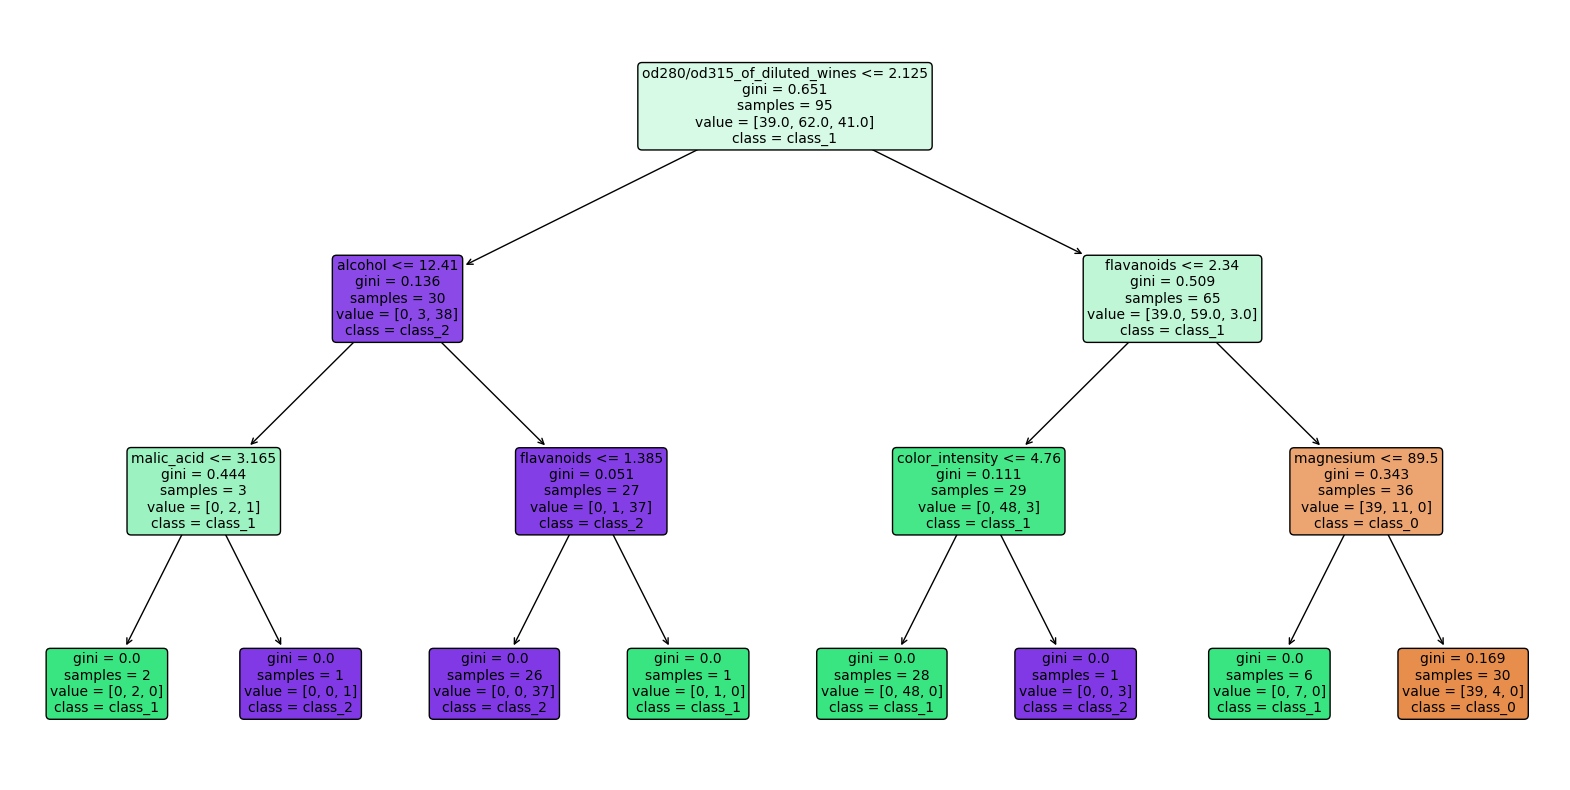

In [82]:
estimator = model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(estimator, 
          feature_names=wine.feature_names, 
          class_names=wine.target_names, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()

Random forests do not allow for an unequivocal "coefficient" for each variable, since they are composed of collections of decision trees. For this reason, they can are often held as "black boxes". To effectively communicate our findings to shareholders, we utilize feature importance, which highlights the significance of each variable in the model.

Scikit-learn measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a weighted average, where each node's weight is equal to the number of training samples that are associated with it (see Chapter 6).

Scikit-Learn computes this score automatically for each feature after training, then it scales the results so that the sum of all importances is equal to 1 . You can access the result using the `feature_importances_` variable. For example, the following code trains a `RandomForestClassifier` on the iris dataset (introduced in Chapter 4) and outputs each feature's importance. 

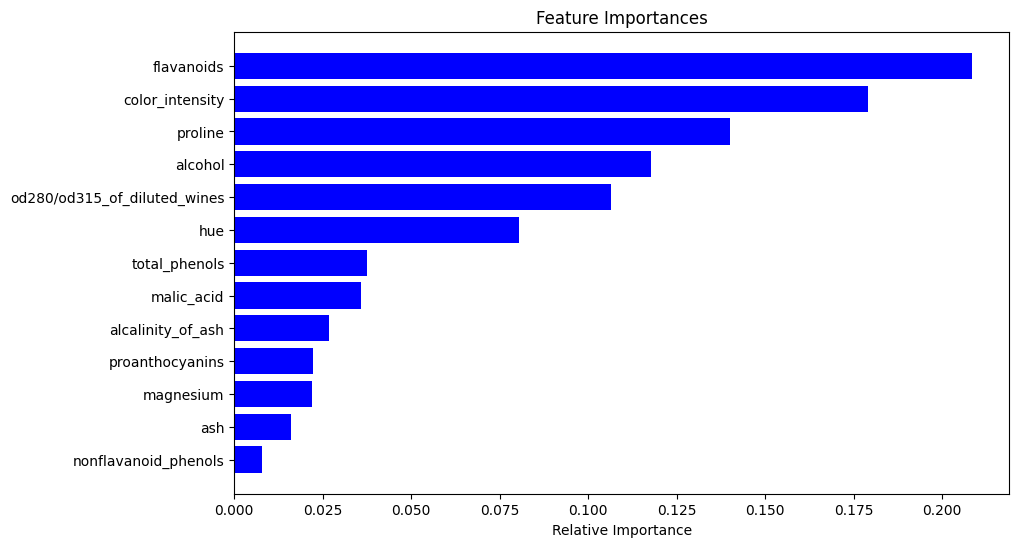

In [84]:
# Extract and plot feature importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Advantages of Random Forest
- **Improved Accuracy**: By averaging multiple trees, the model reduces the risk of overfitting and improves generalization.

- **Robustness to Noise**: The random sampling of data and features makes the model less sensitive to noise in the training data.

- **Feature Importance**: Random Forest can provide estimates of feature importance, helping in understanding which features contribute the most to the prediction.

## IN-CLASS: 
1. Load the Breast Cancer dataset and split it into training and testing sets.
2. Preprocess the Data
3. Train a Random Forest Classifier
4. Make Predictions
5. Evaluate the Model
6. Show Feature Importance

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 59   4]
 [  1 107]]


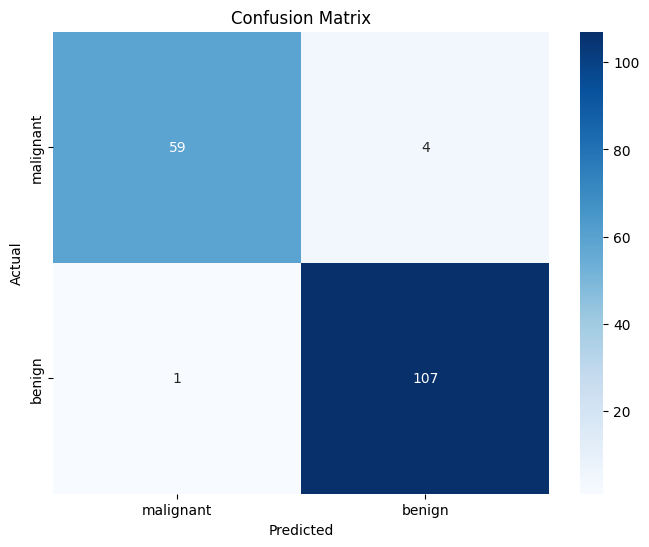

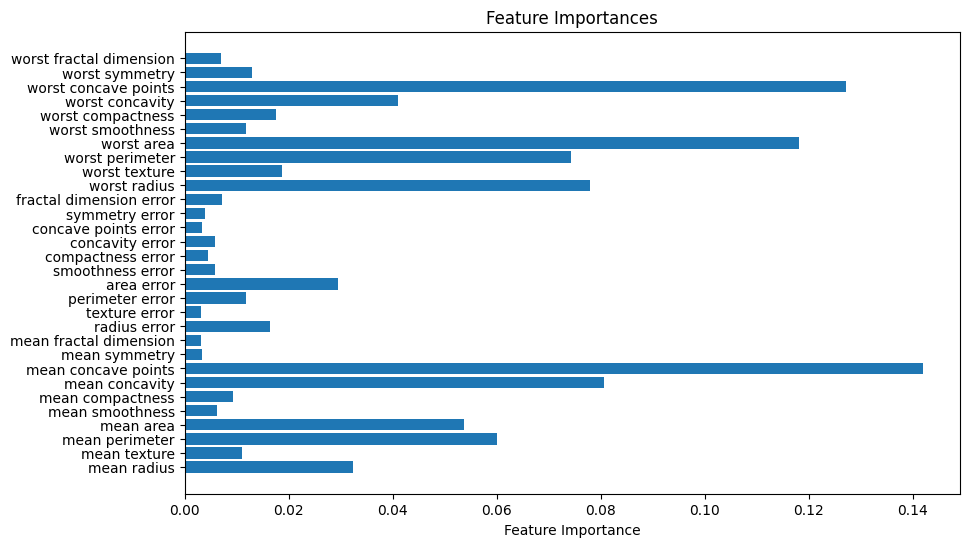

In [86]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# from sklearn.preprocessing import StandardScaler

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

import numpy as np

# Extract feature importances
feature_importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), breast_cancer.feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


### 9.5.5. Using Random Forests for Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston housing dataset from OpenML
boston = fetch_openml(name='Boston', version=1, as_frame=True)
X = boston.data
y = boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Feature importance
feature_importance = random_forest_regressor.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print('Feature Importance:')
print(feature_importance_df)


Mean Squared Error: 7.901513892156864
R^2 Score: 0.8922527442109116
Feature Importance:
    Feature  Importance
5        RM    0.503845
12    LSTAT    0.309509
7       DIS    0.060549
0      CRIM    0.038062
10  PTRATIO    0.016313
9       TAX    0.015661
4       NOX    0.015544
6       AGE    0.013840
11        B    0.012154
2     INDUS    0.007953
8       RAD    0.003811
1        ZN    0.001756
3      CHAS    0.001004


## 9.6. Unsupervised Learning: K-Means Clustering

### 9.6.1. Introduction to Unsupervised Learning
Unsupervised learning involves training algorithms on data without labeled responses. The primary purpose of unsupervised learning is to identify 

patterns, structures, or relationships within the data. Common algorithms used in unsupervised learning include K-means clustering, hierarchical 

clustering, and DBSCAN.

### 9.6.2. K-Means Clustering Overview
- **Objective**: Partition data into k clusters, where each data point belongs to the cluster with the nearest mean.

- **Applications**: Market segmentation, image compression, anomaly detection, document clustering.

### 9.6.3. Algorithm Steps
1. **Initialization**: Select k initial centroids (randomly or using a heuristic like K-means++ for better results).

2. **Assignment**: Assign each data point to the nearest centroid, forming k clusters.

3. **Update**: Compute the new centroids as the mean of the data points in each cluster.

4. **Repeat**: Iterate the assignment and update steps until centroids no longer change significantly (convergence).

### Mathematical Formulation
- **Distance Metric**: Typically uses Euclidean distance to measure the similarity between data points and centroids.

- **Objective Function**: Minimize the sum of squared distances from each point to its assigned centroid:
  
  $$J = \sum_{i=1}^{k} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2 $$
  where $C_i$ is the i-th cluster and $\mu_i$ is its centroid.

The following code generates artificial clusters.

In [87]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data using make_blobs
n_samples = 300
n_features = 2
centers = 5
cluster_std = 1.0
data, true_labels = make_blobs(n_samples=n_samples, centers=centers, n_features=n_features, cluster_std=cluster_std, random_state=42)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2'])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the standardized data back to a DataFrame
df_scaled = pd.DataFrame(data_scaled, columns=['Feature 1 (scaled)', 'Feature 2 (scaled)'])

The following code fits the KMeans algorithm for k clusters and conveniently plots a graph.

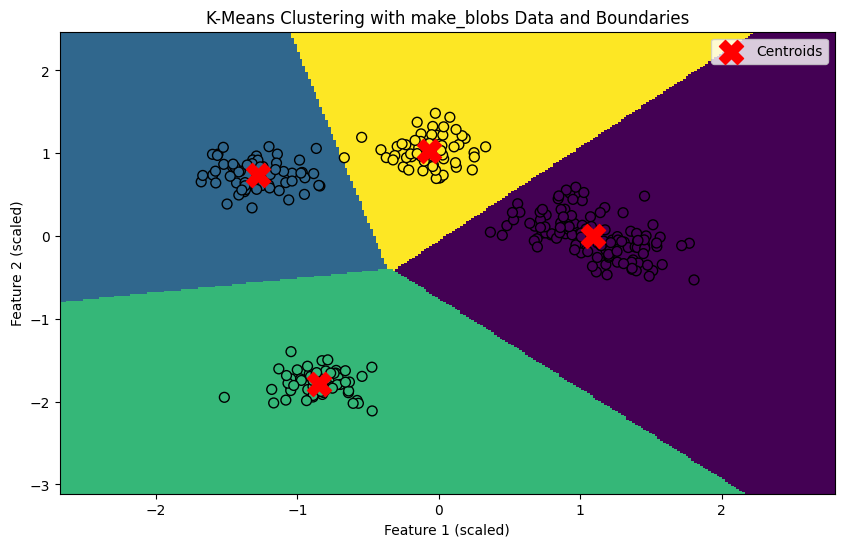

In [101]:
# Set the number of clusters
k = 4

# Create and fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Define the size of the mesh grid
h = .02  # step size in the mesh

# Create a mesh grid
x_min, x_max = data_scaled[:, 0].min() - 1, data_scaled[:, 0].max() + 1
y_min, y_max = data_scaled[:, 1].min() - 1, data_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict cluster for each point in the mesh grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the boundaries and clusters
plt.figure(figsize=(10, 6))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='viridis', aspect='auto', origin='lower')

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, edgecolor='k', s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('K-Means Clustering with make_blobs Data and Boundaries')
plt.legend()
plt.show()



### 9.6.4. Choosing the Number of Clusters (k)

- **Elbow Method**: Plot the sum of squared distances (inertia) for different values of k and look for an "elbow" point where the rate of decrease sharply slows.

### IN-CLASS: 
Re-run the example above with 5 and 6 centroids in the K-means algorithm. What do you see? In your opinion, when should we stop increasing the number of centroids?

## 9.7. Neural Networks and Deep Learning

Neural Networks are at the core of Deep Learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks, such as classifying billions of images.

The most common libraries for Neural Networks are `tensorflow` and `pytorch`. For teaching purposes, we will use Google Colab, since it will save us the time of configuring our computer's GPUs (Graphical Processing Unit), which significantly accelerates work with them. 

The following tutorial is part of TensorFlow's documentation website. Such thorough documentation is another reason to like Python!

Let's move to Google Colab for this part:
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb


<div align="center">

# Have fun in your journey with Python!

</div>